In [37]:
# source("https://bioconductor.org/biocLite.R")
# biocLite("limma")
# biocLite("edgeR")

library(limma)
library(reshape2)
library(ggplot2)
library(dtplyr)
library(data.table)
library(edgeR)

In [112]:
# Read in sample matrix
sampleInfo <- fread("../team115_lustre/1_analyse_clonotypes/sample_info.csv")
sampleInfo <- sampleInfo[order(sampleInfo$"Tag Index")]
sampleInfo <- sampleInfo[sampleInfo$"Tag Index" != "20", ]

# Read in counts matrix
counts.clonotype <- fread("../team115_lustre/1_analyse_clonotypes/count_clonotype.csv", header = T)
rownames(counts.clonotype) <- counts.clonotype$clonotype
counts.clonotype$clonotype <- NULL
colnames(counts.clonotype) <- paste("LEA_S", colnames(counts.clonotype), sep="")

dge.clonotype <- DGEList(counts = counts.clonotype)

In [27]:
?fread

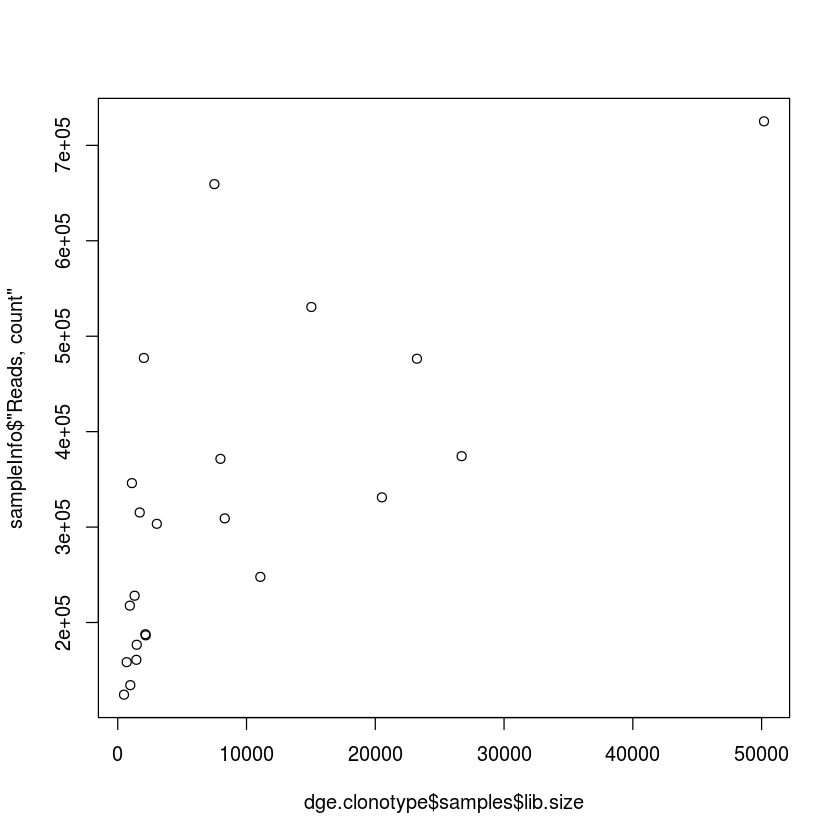

In [114]:
plot(dge.clonotype$samples$lib.size, sampleInfo$"Reads, count")
# print(sampleInfo$"Reads, count")
# print(dge.clonotype$samples$lib.size)
# print(dge.clonotype$samples)
# print(sampleInfo)



In [82]:
str(sampleInfo)

Classes ‘data.table’ and 'data.frame':	23 obs. of  12 variables:
 $ Tag Index       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Tag             : chr  "TCTACGAC" "TGACAGAC" "TAGAACAC" "TCATCCTA" ...
 $ Reads, count    : int  160933 228123 186590 124422 158508 134387 659407 187748 309159 371535 ...
 $ Reads, %        : num  0.87 1.23 1.01 0.67 0.86 0.73 3.57 1.02 1.67 2.01 ...
 $ Irods           : chr  "20154_1#1" "20154_1#2" "20154_1#3" "20154_1#4" ...
 $ Sample_name     : chr  "LEA_S1" "LEA_S2" "LEA_S3" "LEA_S4" ...
 $ Sample_info     : chr  "1.      1017 day 0 MBC" "2.      1017 day 0 plasma cells" "3.      1017 day 140 MBC" "4.      1017 day 140 plasma cells" ...
 $ VDJtools_Patient: chr  "P1" "P1" "P1" "P1" ...
 $ patient_code    : int  1017 1017 1017 1017 2207 2207 2207 2207 1019 1019 ...
 $ day             : int  0 0 140 140 63 63 140 140 140 140 ...
 $ cell_type       : chr  "MBC" "plasma" "MBC" "plasma" ...
 $ norm_factor     : num  2.24 1.58 1.93 2.9 2.27 ...
 - attr(*, ".internal.self

In [67]:
?order